In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isna().sum() # count of missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.isna().sum()*100/df.shape[0] # pct of values missing

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [9]:
#such a small pct --> drop missing values
df.dropna(inplace=True)

In [ ]:
## Here is where we'd normally do EDA & normalize features
## but for the purposes of this session we will jump right in to building models

In [10]:
# Creating dummy variables
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [11]:
#Separate features & labels
y = df_dummy['median_house_value']
x = df_dummy.drop(columns=['median_house_value'])

In [13]:
# split data into testing & training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

# standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [14]:
# Build Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

2023-02-18 07:47:59.912721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
num_features = x_train.shape[1]
num_features

12

In [18]:
# lets make our input layer have 12 nodes then
# we'll add a hidden layer of 8 nodes (power of 2 close to but less than num_features)
# regression problems have a single output node in their output layer

model = Sequential()
model.add(Input(shape=(None,num_features),name='Input_Layer'))
model.add(Dense(8,activation='relu',name='Hidden_Layer'))
model.add(Dense(1,activation='relu',name='Output_Layer'))

2023-02-18 07:53:59.022136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# Compile the model
# MSE --> Mean Squared Error
# MAE --> Mean Average Error
model.compile(loss='mse',metrics=['mae'],optimizer='adam')

In [21]:
# Param Count = (Input Count + 1) * Hidden Features
# The + 1 is the bias unit in the input
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, None, 8)           104       
                                                                 
 Output_Layer (Dense)        (None, None, 1)           9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [23]:
from livelossplot import PlotLossesKerasTF

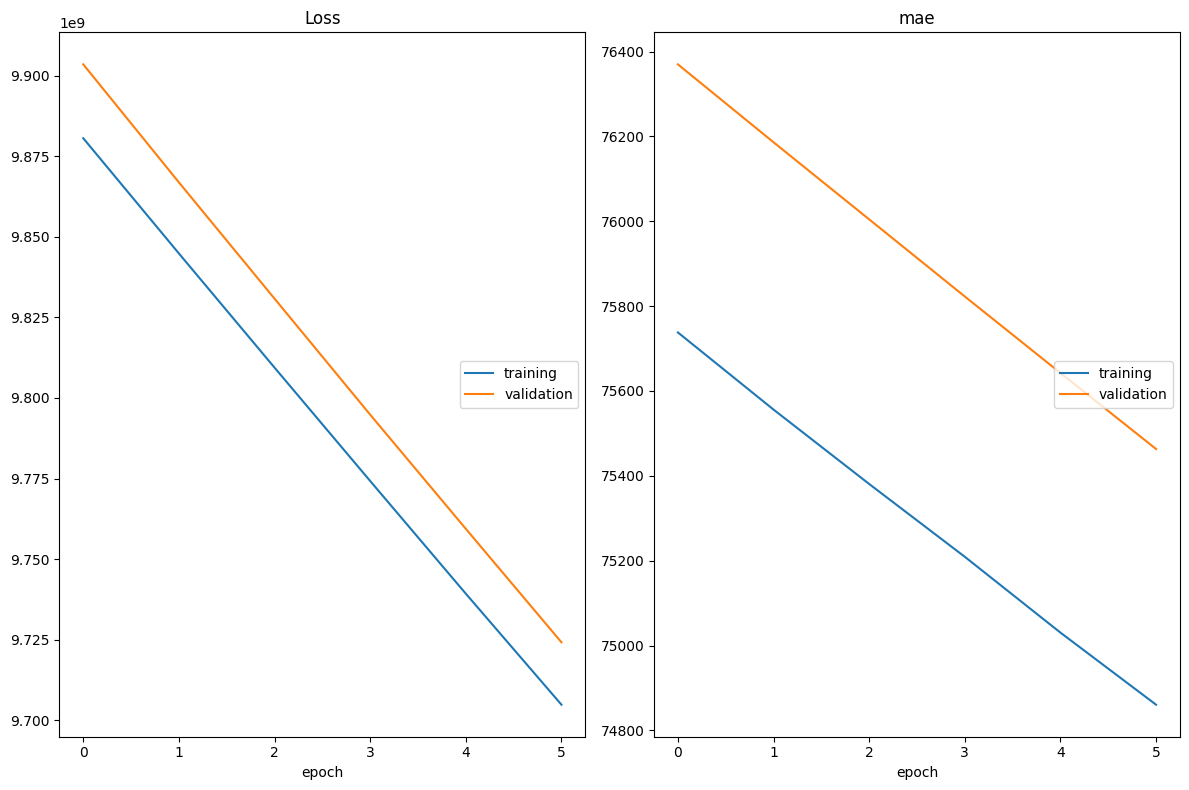

Loss
	training         	 (min: 9704852480.000, max: 9880557568.000, cur: 9704852480.000)
	validation       	 (min: 9724208128.000, max: 9903473664.000, cur: 9724208128.000)
mae
	training         	 (min: 74860.586, max: 75737.969, cur: 74860.586)
	validation       	 (min: 75463.156, max: 76369.773, cur: 75463.156)
479/479 [==============================] - 1s 3ms/step - loss: 9704852480.0000 - mae: 74860.5859 - val_loss: 9724208128.0000 - val_mae: 75463.1562
Epoch 7/200
 94/479 [====>.........................] - ETA: 0s - loss: 9986529280.0000 - mae: 76172.3594

KeyboardInterrupt: 

In [33]:
model.fit(x_train_std,y_train,epochs=200,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [27]:
# Not Great Performance... Create model with more layers

model2 = Sequential()
model2.add(Input(shape=(None,num_features),name='Input_Layer'))
model2.add(Dense(16,activation='relu',name='Hidden_Layer_1'))
model2.add(Dense(16,activation='relu',name='Hidden_Layer_2'))
model2.add(Dense(1,activation='relu',name='Output_Layer'))

In [31]:
model2.compile(loss='mse',metrics=['mae'],optimizer='adam')

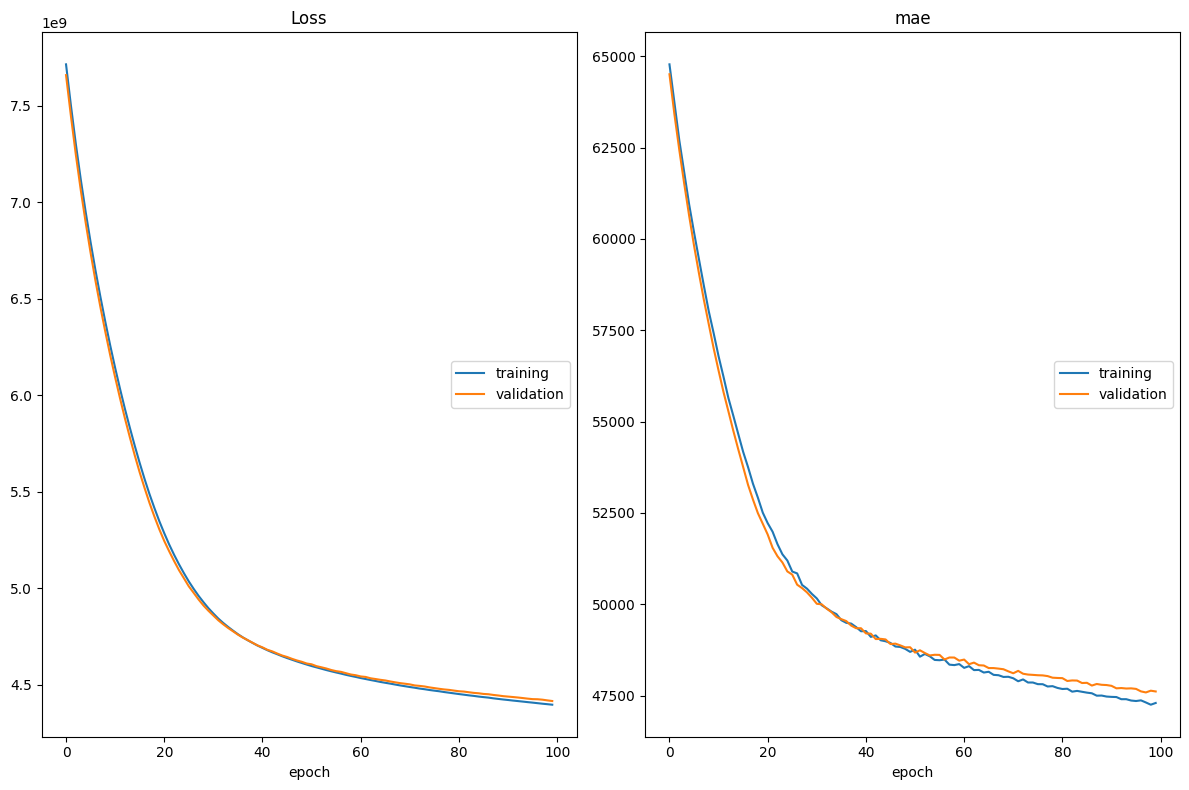

Loss
	training         	 (min: 4397619200.000, max: 7713150976.000, cur: 4397619200.000)
	validation       	 (min: 4416735744.000, max: 7657468416.000, cur: 4416735744.000)
mae
	training         	 (min: 47248.980, max: 64781.301, cur: 47296.340)
	validation       	 (min: 47584.918, max: 64509.988, cur: 47611.547)
479/479 [==============================] - 1s 2ms/step - loss: 4397619200.0000 - mae: 47296.3398 - val_loss: 4416735744.0000 - val_mae: 47611.5469


In [32]:
# A bit better!
model2.fit(x_train_std,y_train,epochs=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [34]:
# What if we change the activation function 

model3 = Sequential()
model3.add(Input(shape=(None,num_features),name='Input_Layer'))
model3.add(Dense(16,activation='sigmoid',name='Hidden_Layer_1'))
model3.add(Dense(16,activation='sigmoid',name='Hidden_Layer_2'))
model3.add(Dense(1,activation='relu',name='Output_Layer'))

In [35]:
model3.compile(loss='mse',metrics=['mae'],optimizer='adam')

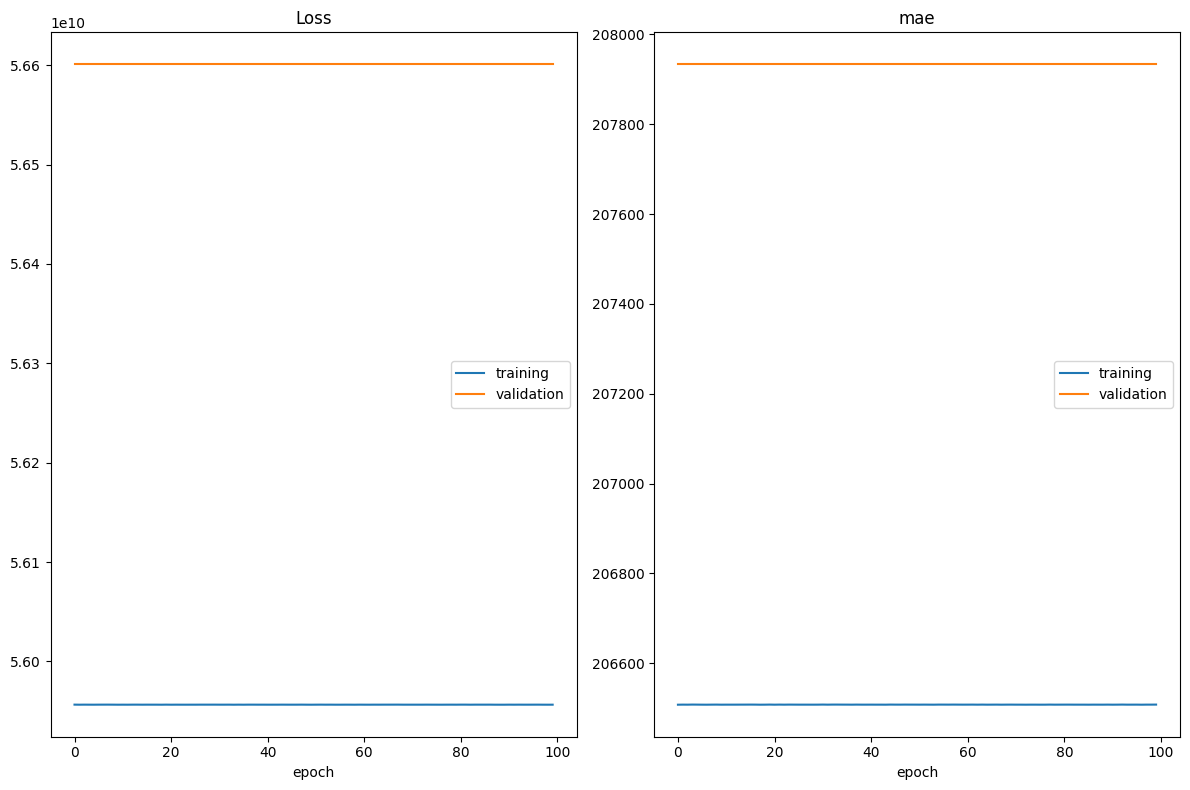

Loss
	training         	 (min: 55956500480.000, max: 55956578304.000, cur: 55956525056.000)
	validation       	 (min: 56600805376.000, max: 56600805376.000, cur: 56600805376.000)
mae
	training         	 (min: 206507.875, max: 206508.156, cur: 206508.125)
	validation       	 (min: 207933.469, max: 207933.469, cur: 207933.469)
479/479 [==============================] - 1s 2ms/step - loss: 55956525056.0000 - mae: 206508.1250 - val_loss: 56600805376.0000 - val_mae: 207933.4688


In [36]:
# Welp sigmoid is not that great at regression! --> Use Relu for Regression

model3.fit(x_train_std,y_train,epochs=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [37]:
# What about adding another layer? (to the Relu model2)

model4 = Sequential()
model4.add(Input(shape=(None,num_features),name='Input_Layer'))
model4.add(Dense(16,activation='relu',name='Hidden_Layer_1'))
model4.add(Dense(16,activation='relu',name='Hidden_Layer_2'))
model4.add(Dense(16,activation='relu',name='Hidden_Layer_3'))
model4.add(Dense(1,activation='relu',name='Output_Layer'))

In [38]:
model4.compile(loss='mse',metrics=['mae'],optimizer='adam')

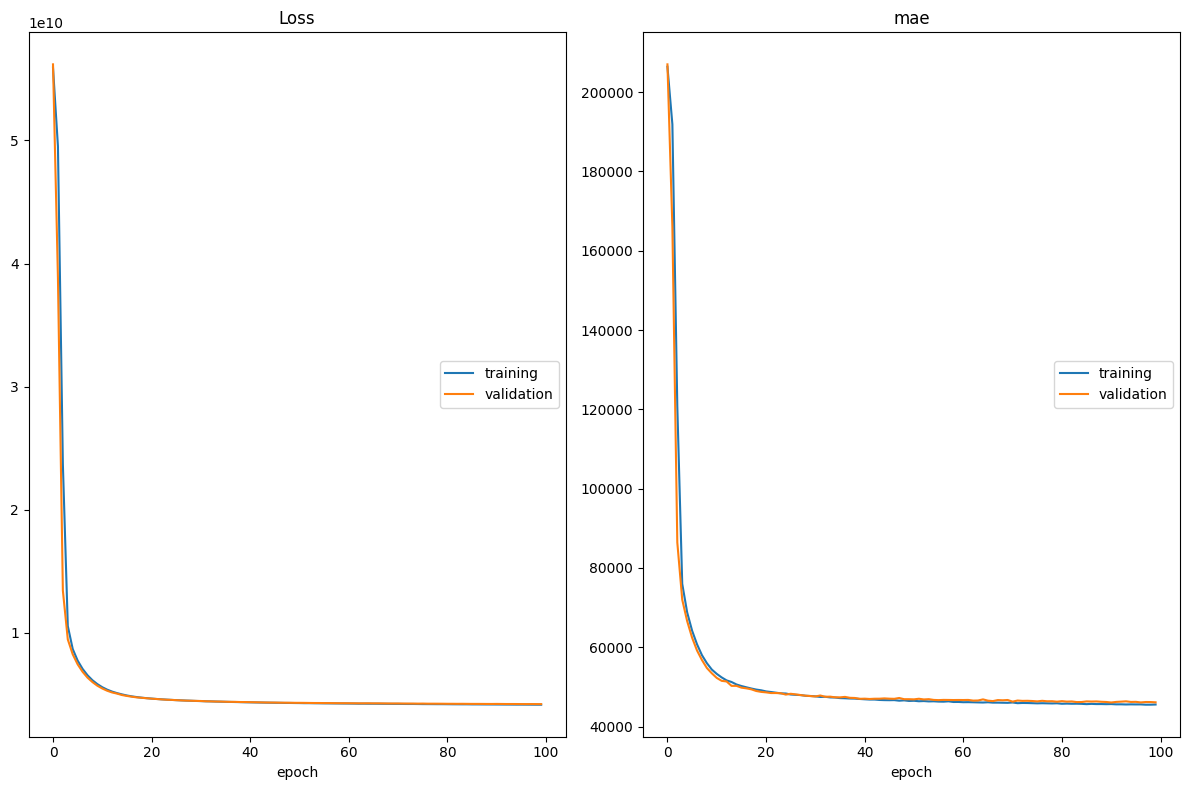

Loss
	training         	 (min: 4161923328.000, max: 55914082304.000, cur: 4161923328.000)
	validation       	 (min: 4209198848.000, max: 56182710272.000, cur: 4209198848.000)
mae
	training         	 (min: 45506.543, max: 206412.391, cur: 45555.262)
	validation       	 (min: 46064.504, max: 207005.703, cur: 46110.262)
479/479 [==============================] - 1s 2ms/step - loss: 4161923328.0000 - mae: 45555.2617 - val_loss: 4209198848.0000 - val_mae: 46110.2617


In [39]:
# A bit better tahn even model 2! definitely converged faster, slightly better loss/MAE
model4.fit(x_train_std,y_train,epochs=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])